# 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
telecom_cust = pd.read_csv('C:/Users/ylee5/telecom_churn_rate.csv')

In [3]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.shape

(7043, 21)

In [5]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Check the data types
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Convert Total Charges to a numerical data type
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [8]:
# Check if there are any missing values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Remove the rows with missing values
telecom_cust.dropna(inplace = True)

In [10]:
# Remove customer IDs from the data set
df = telecom_cust.iloc[:,1:]

In [11]:
# Convert the predictor variable in a binary variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

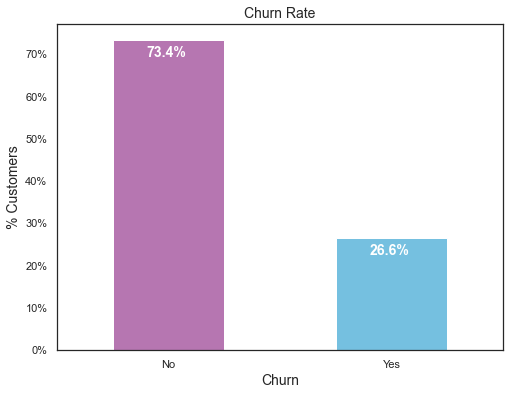

In [12]:
colors = ['#b676b1','#75c0e0']

# Churn rate
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0,
                                                                          color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Churn',size = 14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn Rate', size = 14)

# Add the data labels on the bar chart
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, str(round((i.get_height()/total), 1))+'%',
            color='white', weight = 'bold', size = 14)

- The response variable is imbalanced as we would expect a large majority of the customers to not churn.

In [13]:
# Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


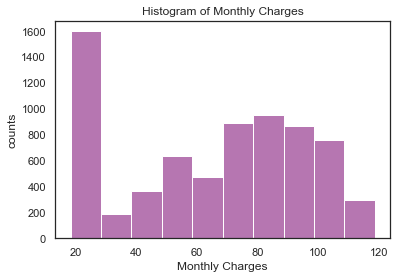

In [14]:
# Histograms of numerical variables -- Monthly Charges

plt.hist(telecom_cust['MonthlyCharges'], color = '#b676b1')
plt.xlabel('Monthly Charges')
plt.ylabel('counts')
plt.title('Histogram of Monthly Charges')
plt.show() 

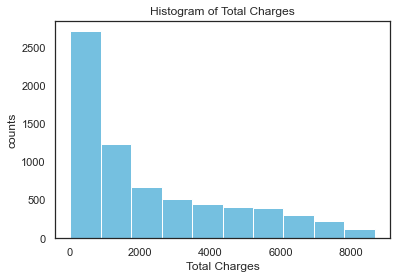

In [15]:
# Histograms of numerical variables -- Total Charges

plt.hist(telecom_cust['TotalCharges'], color = '#75c0e0')
plt.xlabel('Total Charges')
plt.ylabel('counts')
plt.title('Histogram of Total Charges')
plt.show() 

- Both monthly charges and total charges are right-skewed distributed but I have decided not to make any transformation or manipulation since they were good enough and without transformation we can keep the interpretation simpler.

<AxesSubplot:>

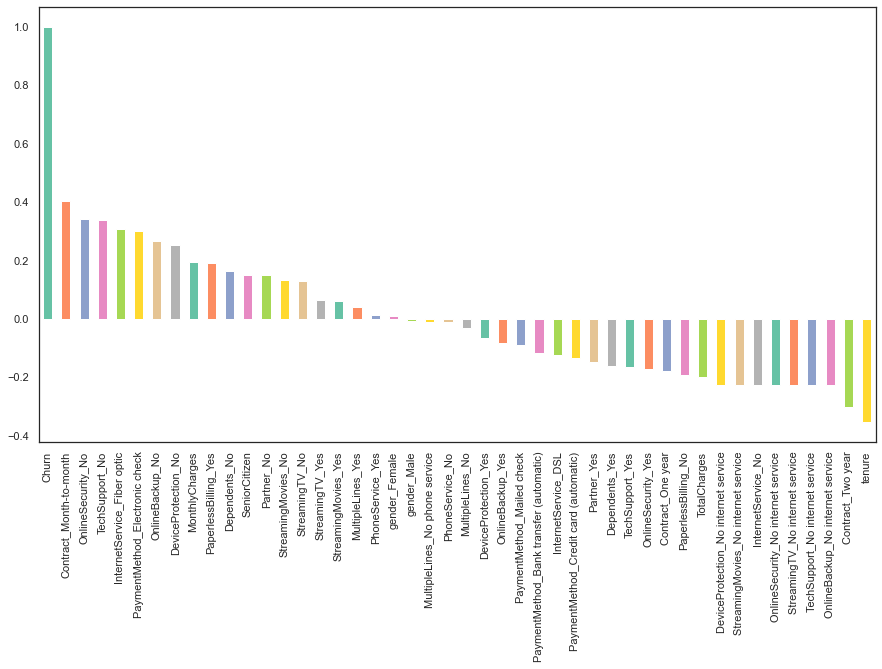

In [16]:
# Get Correlation of "Churn" with other variables
palette = sns.color_palette("Set2")
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = palette)

- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
- Tenure and two year contracts seem to be negatively correlated with churn.

### A. Demographics

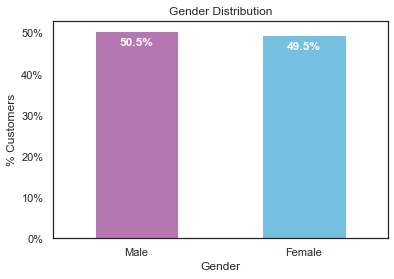

In [17]:
# Gender
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# Add the data labels on the bar chart
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%', 
            fontsize=12, color='white', weight = 'bold')

- About half of the customers in our data set are male while the other half are female.

Text(0.5, 1.0, '% of Senior Citizens')

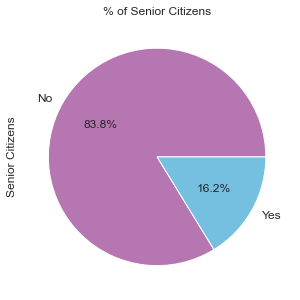

In [18]:
# Senior Citizens
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', 
                                                                                      labels = ['No', 'Yes'],
                                                                                      figsize =(5,5), fontsize = 12,
                                                                                      colors = colors)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

- Most of our customers in the data set are younger people.

In [19]:
# Churn by Seniority
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()
seniority_churn

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


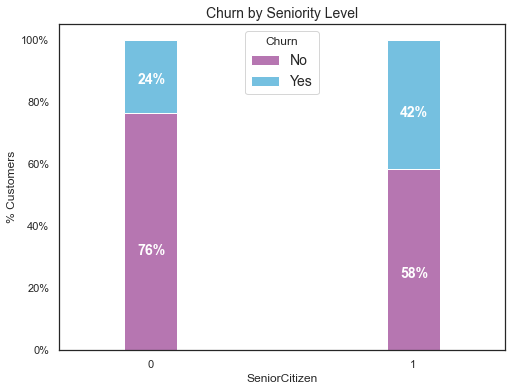

In [20]:
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True,
                                                                rot = 0, figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white', weight = 'bold', size =14)

- Senior Citizens have almost double the churn rate than younger population.

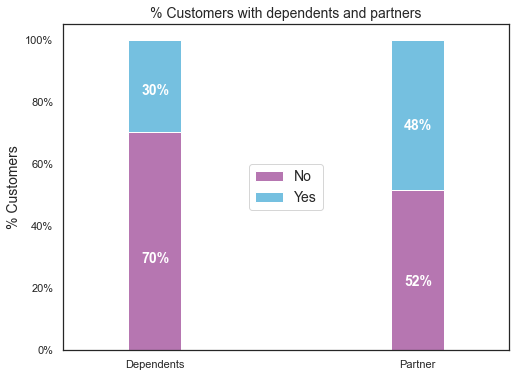

In [21]:
# Partner and dependent status
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)

ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6),rot = 0, width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

# Add the data labels on the stacked bar chart
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+.4*height), color = 'white', weight = 'bold', size = 14)

- About 50% of the customers have a partner, while only 30% of the total customers have dependents.

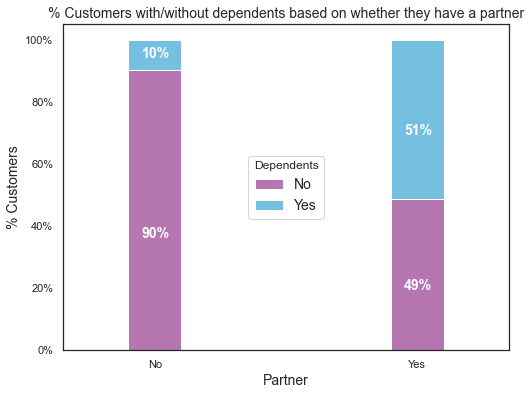

In [22]:
# Customers with/without dependents based on whether they have a partner
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0, 
                                                                figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 14)

- Among the customers who have a partner, only about half of them also have a dependentd. Among the customers who do not have any partner, a majority of them do not have any dependents.

### B. Customer Account Information

C:\Users\ylee5\miniconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

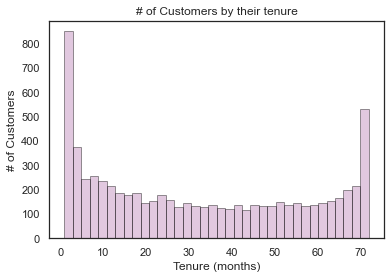

In [23]:
# Tenure
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, bins=int(180/5), color = '#b676b1', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

- We have a higher number of customers in the first month and in the 72nd month and this may be due to customers with different contract type.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

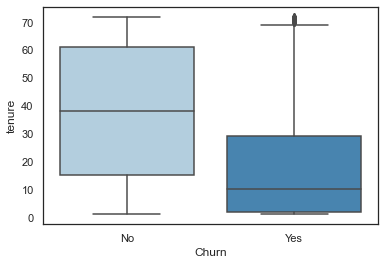

In [24]:
# Churn vs Tenure
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure, palette="Blues")

- The customers who do not churn tend to stay for a longer tenure with the telecom company.

Text(0.5, 1.0, '# of Customers by Contract Type')

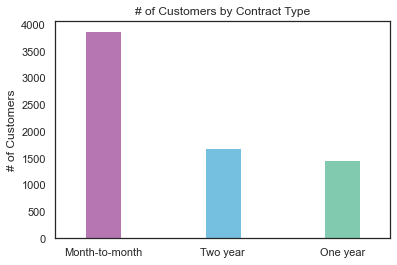

In [25]:
# Contracts
colors_3 = ['#b676b1','#75c0e0','#82caaf']

ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color = colors_3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

- Most of the customers are in the month to month contract.

C:\Users\ylee5\miniconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

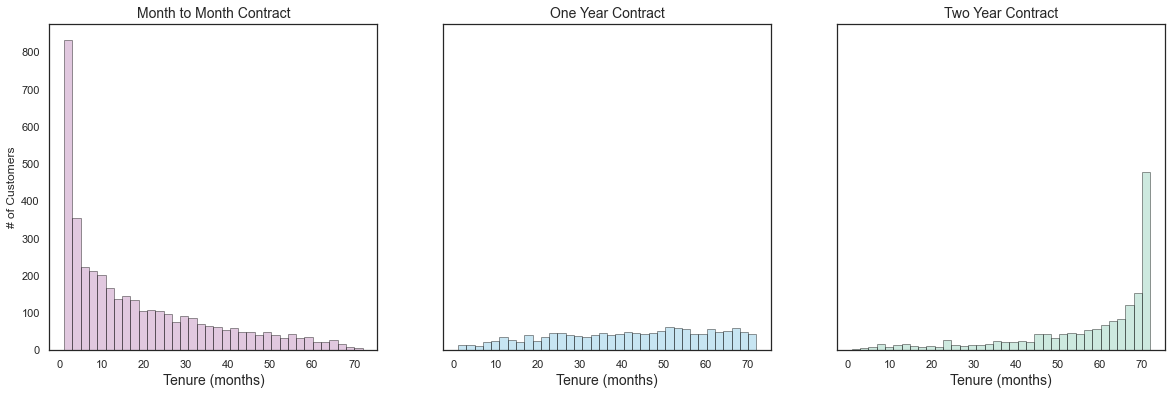

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False, bins=int(180/5), color = '#b676b1',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#75c0e0',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#82caaf',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

- Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

In [27]:
# Churn by Contract Type
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


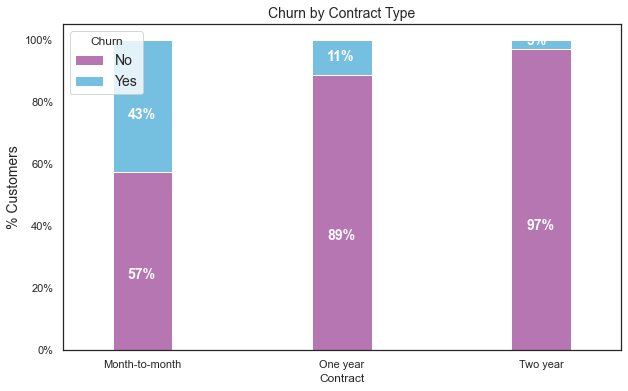

In [29]:
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,
                                                                rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white', weight = 'bold', size = 14)

- The customers who have a month to month contract have a very high churn rate.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

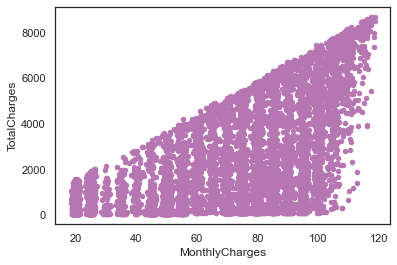

In [30]:
# The relation between monthly and total charges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges',
                                                             color = '#b676b1')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

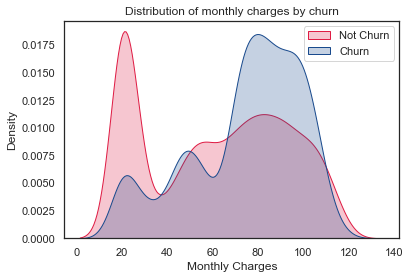

In [31]:
# Churn by Monthly Charges
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ], color='#df1c44', shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ], ax = ax, color='#194a8d', shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

- Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of total charges by churn')

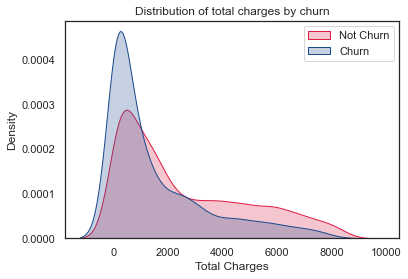

In [32]:
# Churn by Total Charges
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ], color='#df1c44', shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ], ax = ax, color='#194a8d', shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

- There is higer churn when the total charges are lower.

### C. Services Information

In [33]:
# Columns
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [34]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

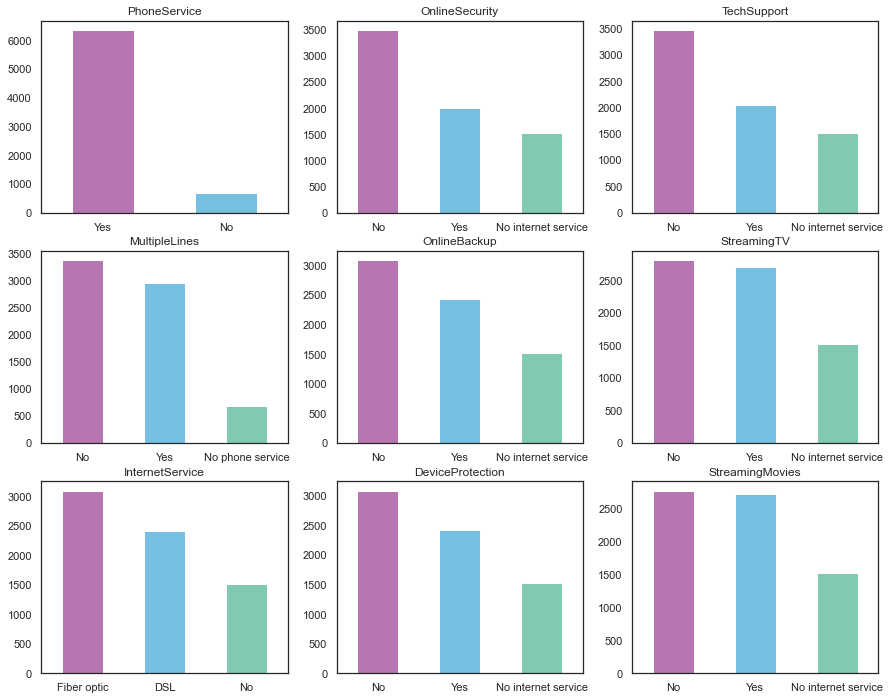

In [35]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = colors_3)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = colors_3)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = colors_3)
    ax.set_title(item)

# 2. Data Preparation

### A. Resampling (to deal with Imbalanced Classes)

In [36]:
# Use dataset with dummy variables for categorical values
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [37]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(sampling_strategy="not majority")

In [39]:
X_ros, y_ros = ros.fit_resample(X, y)

In [40]:
y_ros

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
unique, counts = np.unique(y_ros, return_counts = True)

In [42]:
unique

array([0, 1], dtype=int64)

In [43]:
counts

array([5163, 5163], dtype=int64)

### B. Scaling

In [44]:
# Scale all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X_ros.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_ros)
X_ros = pd.DataFrame(scaler.transform(X_ros))
X_ros.columns = features

# 3. Modeling

In [45]:
# Train & Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=220804)

### A. Logistic Regression -- baseline model

In [46]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [47]:
# Get predicted values and calculate accuracy
from sklearn import metrics
prediction_test_1 = model.predict(X_test)

print('Accuracy: ' + str(round(metrics.accuracy_score(y_test, prediction_test_1), 4)))
print('Precision: ' + str(round(metrics.precision_score(y_test, prediction_test_1), 4)))
print('Recall: ' + str(round(metrics.recall_score(y_test, prediction_test_1), 4)))
print('F1 Score: ' + str(round(metrics.f1_score(y_test, prediction_test_1), 4)))
print('ROC_AUC: ' + str(round(metrics.roc_auc_score(y_test, prediction_test_1), 4)))

Accuracy: 0.7517
Precision: 0.7356
Recall: 0.7874
F1 Score: 0.7606
ROC_AUC: 0.7516


<AxesSubplot:>

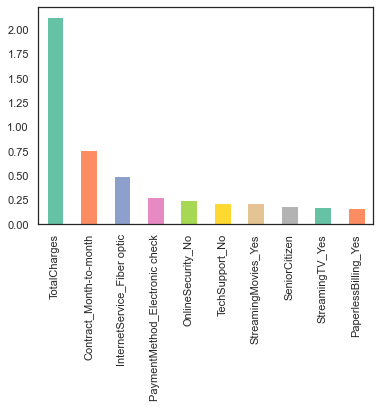

In [48]:
# Feature Importance
weights = pd.Series(model.coef_[0], index=X.columns.values)

weights.sort_values(ascending = False)[:10].plot(kind='bar', color = palette)

- Total charges, monthly contracts and fiber optic internet services can lead to higher churn rates.

<AxesSubplot:>

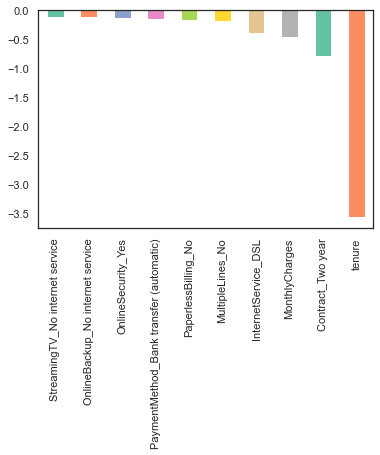

In [49]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = palette)

- Having a 2-year contract along with tenure has the most negative relation with Churn. Having DSL internet service also reduces chances of churn.

### B. Random Forest

In [50]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state = 220805, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

C:\Users\ylee5\miniconda3\envs\py39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=220805)

In [51]:
# Get predicted values and calculate accuracy
prediction_test_2 = model_rf.predict(X_test)

print('Accuracy: ' + str(round(metrics.accuracy_score(y_test, prediction_test_2), 4)))
print('Precision: ' + str(round(metrics.precision_score(y_test, prediction_test_2), 4)))
print('Recall: ' + str(round(metrics.recall_score(y_test, prediction_test_2), 4)))
print('F1 Score: ' + str(round(metrics.f1_score(y_test, prediction_test_2), 4)))
print('ROC_AUC: ' + str(round(metrics.roc_auc_score(y_test, prediction_test_2), 4)))

Accuracy: 0.7638
Precision: 0.7462
Recall: 0.801
F1 Score: 0.7726
ROC_AUC: 0.7637


<AxesSubplot:>

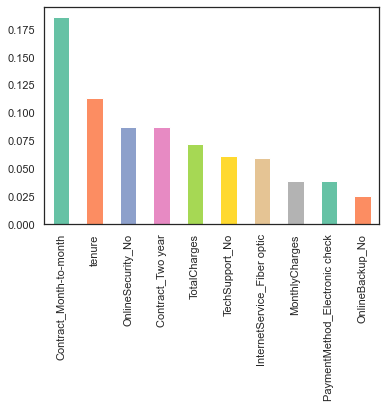

In [52]:
# Feature Importance
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = palette)

- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA.

### C. Support Vector Machine (SVM)

In [53]:
# SVM model
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
prediction_test_3 = model.svm.predict(X_test)

print('Accuracy: ' + str(round(metrics.accuracy_score(y_test, prediction_test_3), 4)))
print('Precision: ' + str(round(metrics.precision_score(y_test, prediction_test_3), 4)))
print('Recall: ' + str(round(metrics.recall_score(y_test, prediction_test_3), 4)))
print('F1 Score: ' + str(round(metrics.f1_score(y_test, prediction_test_3), 4)))
print('ROC_AUC: ' + str(round(metrics.roc_auc_score(y_test, prediction_test_3), 4)))

Accuracy: 0.7372
Precision: 0.6994
Recall: 0.8338
F1 Score: 0.7607
ROC_AUC: 0.737


- The accuracy rate decreases to 73% by using SVM model.

In [69]:
# Coefficients
features_names = np.array(X_train.columns)
coef,names = zip(*sorted(zip(model.svm.coef_[0],features_names)))

In [70]:
coef_top, names_top = coef[:10], names[:10]
coef_bottom, names_bottom = coef[-10:], names[-10:]

In [75]:
coef = np.hstack([coef_top, coef_bottom])

In [76]:
names = np.hstack([names_top, names_bottom])

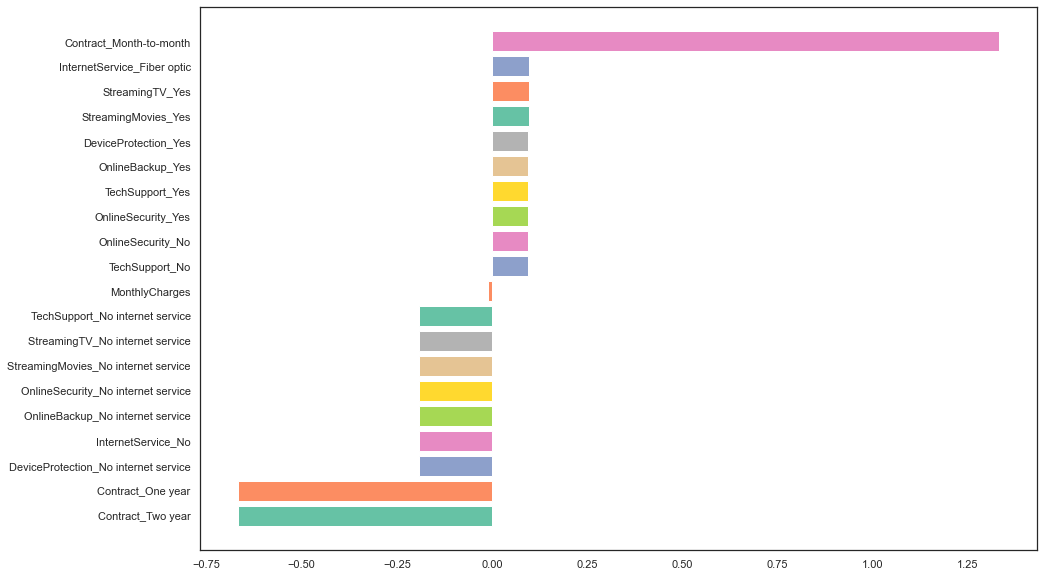

In [77]:
plt.figure(figsize=(15, 10))
plt.barh(range(len(names)), coef, align='center', color = palette)
plt.yticks(range(len(names)), names)
plt.show()

- Monthly contract is the most important predictor variables to predict churn and having a 1-year or 2-year contract has the most negative relation with Churn.

### D. ADA Boost

In [78]:
# AdaBoost model
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()

In [79]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier()

In [80]:
prediction_test_4 = model_ada.predict(X_test)

print('Accuracy: ' + str(round(metrics.accuracy_score(y_test, prediction_test_4), 4)))
print('Precision: ' + str(round(metrics.precision_score(y_test, prediction_test_4), 4)))
print('Recall: ' + str(round(metrics.recall_score(y_test, prediction_test_4), 4)))
print('F1 Score: ' + str(round(metrics.f1_score(y_test, prediction_test_4), 4)))
print('ROC_AUC: ' + str(round(metrics.roc_auc_score(y_test, prediction_test_4), 4)))

Accuracy: 0.7585
Precision: 0.7384
Recall: 0.8019
F1 Score: 0.7689
ROC_AUC: 0.7584


- The accuracy rate increases up to 76% by using ADA Boost model.

<AxesSubplot:>

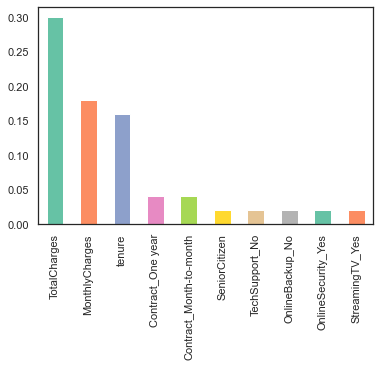

In [81]:
# Feature Importance
importances = model_ada.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = palette)

- Total charges, monthly charges and tenure are the most important predictor variables to predict churn.

### E. XG Boost

In [82]:
# XGBoost model
from xgboost import XGBClassifier
model_xg = XGBClassifier()

In [83]:
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
prediction_test_5 = model_xg.predict(X_test)

print('Accuracy: ' + str(round(metrics.accuracy_score(y_test, prediction_test_5), 4)))
print('Precision: ' + str(round(metrics.precision_score(y_test, prediction_test_5), 4)))
print('Recall: ' + str(round(metrics.recall_score(y_test, prediction_test_5), 4)))
print('F1 Score: ' + str(round(metrics.f1_score(y_test, prediction_test_5), 4)))
print('ROC_AUC: ' + str(round(metrics.roc_auc_score(y_test, prediction_test_5), 4)))

Accuracy: 0.8504
Precision: 0.8097
Recall: 0.9169
F1 Score: 0.86
ROC_AUC: 0.8503


- The accuracy rate increases up to 85% by using XG Boost model. 

<AxesSubplot:>

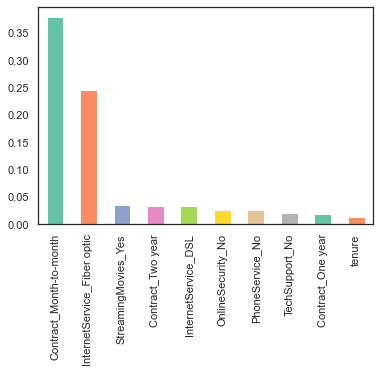

In [85]:
# Feature Importance
importances = model_xg.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = palette)

- Monthly charges and fiber optic internet service are the most important predictor variables to predict churn.

# 4. Results

### Key foundings and Recommendations

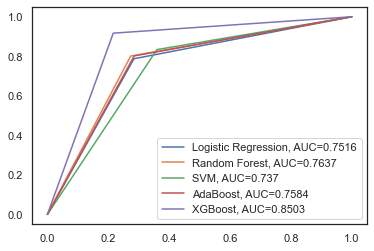

In [86]:
# Multiple ROC Curves of different models
# Set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test_1)
auc = round(metrics.roc_auc_score(y_test, prediction_test_1), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test_2)
auc = round(metrics.roc_auc_score(y_test, prediction_test_2), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test_3)
auc = round(metrics.roc_auc_score(y_test, prediction_test_3), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test_4)
auc = round(metrics.roc_auc_score(y_test, prediction_test_4), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test_5)
auc = round(metrics.roc_auc_score(y_test, prediction_test_5), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#add legend
plt.legend()

Among the models trained above, the XG Boost model performed the best showing 0.85 accuracy, 0.80 precision, 0.91 recall, 0.86 F1 score and 0.85 ROC AUC. The montly contract, total charges, monthly charges and tenure are the primary features of most of the models which must be considered in the business. Recommendation is to use XG Boost model and it is recommended to plan the limited budget in accordance with the model prediction -- persuading consumers to sign longer term contracts (tenure or two-year contract) and giving consumers huge discounts if they join other services such as fiber optic internet service.

### Potential next steps or further research topics

As there are 20 independent variables, we can check the correlations between predictor variables and consider trying to remove predictor variables with high collinearity.